<a href="https://colab.research.google.com/github/dcatrib/tesePython/blob/main/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-incluir ridge, rf e EN

In [ ]:
!pip install PyMuPDF requests selenium chromedriver-autoinstaller pandas nltk gensim numpy skforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00


In [1]:
import requests
import os
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from google.colab import files
import numpy as np
from gensim.models import KeyedVectors, Word2Vec
import gensim
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [4]:
# Faça o upload do arquivo
uploaded = files.upload()

# Carregando o arquivo Excel corretamente
df_final = pd.read_excel('corpus.xlsx')  # Corrigido para corpus.xlsx


# Extraindo a quarta coluna como corpus (fazendo limpeza de valores não-texto)
corpus = df_final.iloc[:, 12].dropna().tolist()  # Remove valores NaN

corpus = [text for text in corpus if isinstance(text, str) and text.strip() != ""]

# Pré-processamento do texto (divisão em palavras)
# Aqui estamos usando um simples split, mas você pode querer fazer mais pré-processamento
corpus_tokenized = [text.split() for text in corpus]

# Word2Vec (cbow)
print("Treinando Word2Vec...")
word2vec_model = gensim.models.Word2Vec(corpus_tokenized, vector_size=300, window=5, min_count=1, workers=4)
print(df_final.tail(20))

Saving corpus.xlsx to corpus (2).xlsx
Treinando Word2Vec...
   trimestre                                               Link  \
71    2021Q1  https://www.bcb.gov.br/en/publications/copommi...   
72    2021Q2  https://www.bcb.gov.br/en/publications/copommi...   
73    2021Q3  https://www.bcb.gov.br/en/publications/copommi...   
74    2021Q4  https://www.bcb.gov.br/en/publications/copommi...   
75    2022Q1  https://www.bcb.gov.br/en/publications/copommi...   
76    2022Q2  https://www.bcb.gov.br/en/publications/copommi...   
77    2022Q3  https://www.bcb.gov.br/en/publications/copommi...   
78    2022Q4  https://www.bcb.gov.br/en/publications/copommi...   
79    2023Q1  https://www.bcb.gov.br/en/publications/copommi...   
80    2023Q2  https://www.bcb.gov.br/en/publications/copommi...   
81    2023Q3  https://www.bcb.gov.br/en/publications/copommi...   
82    2023Q4  https://www.bcb.gov.br/en/publications/copommi...   
83    2024Q1  https://www.bcb.gov.br/en/publications/copommi...   
84

['recent evolution inflation measures inflation continued downward trend wholesale prices fell mainly due effects recent exchange rate appreciation especially prices tradable goods consumer prices average decelerating although slower rate wholesale level reflecting pressures specific items ipca increased comparison previous accumulating months igpdi decreased compared increase ipadi fell comparison previous igp di ipadi fell consecutive totaling respectively comparison regarding evolution ipca average increase electricity due increases household electricity tariffs public lighting taxes capitals largest single contribution increase ipca increase price rice contributed significantly ipca inflation inflation market regulated prices ipca slowed increase market prices fell due deceleration inflation nontradable goods prices remained stable mainly due declines prices perishable foods increase service prices slowdown inflation tradable goods prices intense prices rising compared continuing u

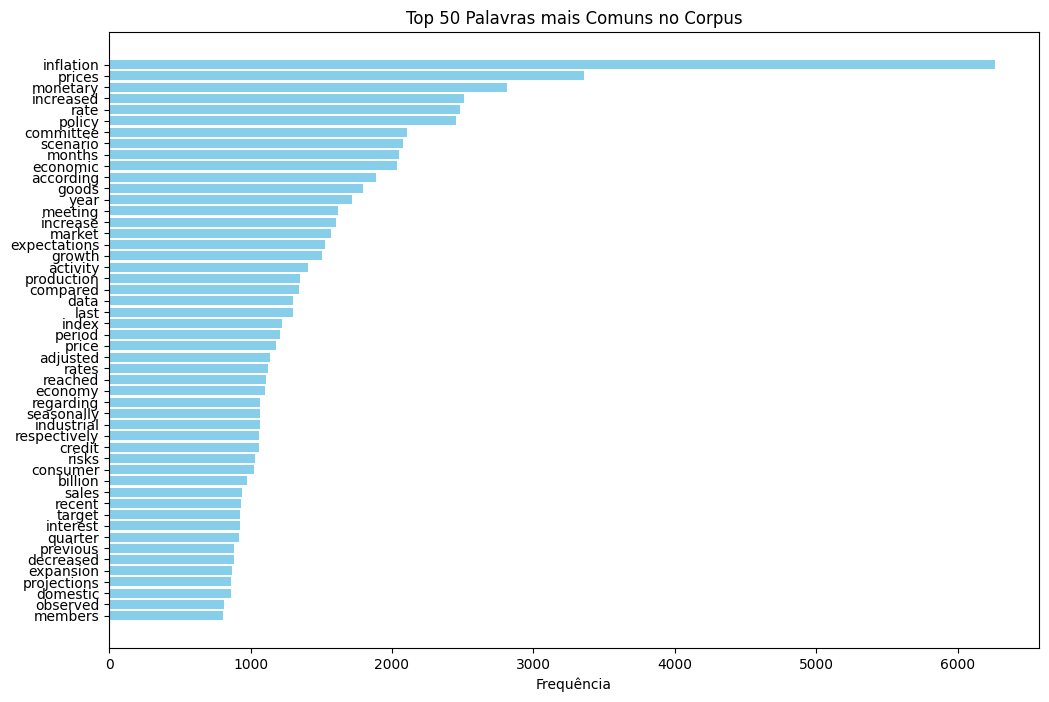


Estatísticas adicionais:
Total de palavras: 276002
Total de palavras únicas: 5693
Comprimento médio das palavras: 7.52 caracteres


In [5]:
from collections import Counter
import matplotlib.pyplot as plt
print(corpus[:3])  # Exibe as 3 primeiras amostras processadas

# Flatten the list of tokenized words (corpus_tokenized)
flat_corpus = [word for sublist in corpus_tokenized for word in sublist]

# Contar a frequência de palavras
word_freq = Counter(flat_corpus)

# Obter as 20 palavras mais comuns e suas frequências
top_50_words = word_freq.most_common(50)

# Exibindo as 20 palavras mais comuns
print("As 50 palavras mais comuns:")
for word, freq in top_50_words:
    print(f"{word}: {freq}")

# Visualizar as 20 palavras mais comuns com um gráfico
words, freqs = zip(*top_50_words)
plt.figure(figsize=(12, 8))
plt.barh(words, freqs, color='skyblue')
plt.xlabel('Frequência')
plt.title('Top 50 Palavras mais Comuns no Corpus')
plt.gca().invert_yaxis()  # Para as palavras mais frequentes ficarem no topo
plt.show()

# Outras estatísticas
total_palavras = len(flat_corpus)
total_palavras_unicas = len(word_freq)
comprimento_medio_palavra = np.mean([len(word) for word in flat_corpus])

print(f"\nEstatísticas adicionais:")
print(f"Total de palavras: {total_palavras}")
print(f"Total de palavras únicas: {total_palavras_unicas}")
print(f"Comprimento médio das palavras: {comprimento_medio_palavra:.2f} caracteres")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['recent', 'evolution', 'inflation', 'measures', 'inflation', 'continued', 'downward', 'trend', 'wholesale', 'prices', 'fell', 'mainly', 'due', 'effects', 'recent', 'exchange', 'rate', 'appreciation', 'especially', 'prices', 'tradable', 'goods', 'consumer', 'prices', 'average', 'decelerating', 'although', 'slower', 'rate', 'wholesale', 'level', 'reflecting', 'pressures', 'specific', 'items', 'ipca', 'increased', 'comparison', 'previous', 'accumulating', 'months', 'igpdi', 'decreased', 'compared', 'increase', 'ipadi', 'fell', 'comparison', 'previous', 'igp']


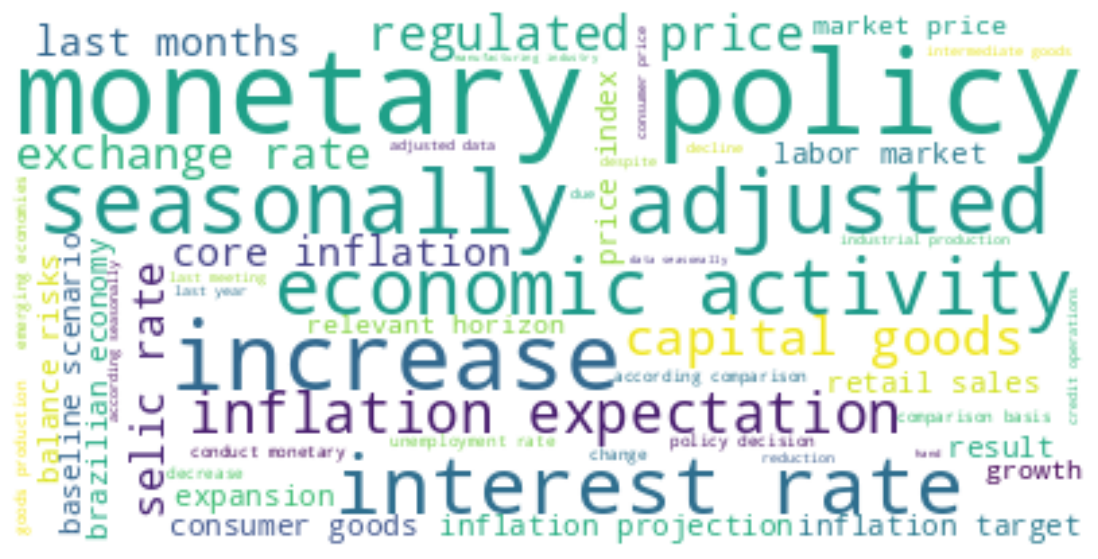

In [6]:
# Generate Word Cloud image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the 'punkt' resource for tokenization
nltk.download('punkt_tab')

text = " ".join(corpus)

# Tokenize the text into individual words using NLTK
tokens = word_tokenize(text)
print(tokens[:50])  # Print the first 50 tokens

# Join the tokens back into a string
text_for_wordcloud = " ".join(tokens)

# Generate the word cloud with the tokenized text
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text_for_wordcloud) #com frases
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(text_for_wordcloud)

plt.figure(figsize=(15,7))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the 'vader_lexicon' resource
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

# Convert the 'Texto Processado2' column to strings, handling NaN values
df_final['Texto Processado2'] = df_final['Texto Processado2'].astype(str)

df_final['polarity'] = df_final['Texto Processado2'].apply(lambda x: analyzer.polarity_scores(x))


# Change data structure
df_final = pd.concat(
    [df_final.drop(['polarity'], axis=1),
     df_final['polarity'].apply(pd.Series)], axis=1)
df_final.head(4)
# Create new variable with sentiment "neutral," "positive" and "negative"
df_final['sentiment'] = df_final['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_final.head(4)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,trimestre,Link,Texto,Link de Download,Texto do PDF,Texto Processado,Ano_Mes,A,B,C,...,PIB_Trimestre_Contra_Trimestre,PIB_Taxa_Trimestral_lag1,PIB_Taxa_Trimestral_lag2,PIB_Trimestre_Contra_Trimestre_lag1,PIB_Trimestre_Contra_Trimestre_lag2,neg,neu,pos,compound,sentiment
0,2003Q2,https://www.bcb.gov.br/en/publications/copommi...,85th Copom minutes - June 2003 84th Copom minu...,https://www.bcb.gov.br/content/copom/copomminu...,Minutes of the 85th Meeting of the Monetary Po...,recent evolution inflation measures inflation ...,2003-06 2003-05,nan nan,nan nan,nan nan,...,-0.834888,2.667028,5.172628,-0.323795,0.980625,0.063,0.758,0.178,0.9999,positive
1,2003Q3,https://www.bcb.gov.br/en/publications/copommi...,88th Copom minutes - September 2003 87th Copom...,https://www.bcb.gov.br/content/copom/copomminu...,1 Minutes of the 88th Meeting of the Monetary ...,recent evolution inflation ipca increased incr...,2003-09 2003-08 2003-07,nan nan nan,nan nan nan,nan nan nan,...,0.841633,0.781242,2.667028,-0.834888,-0.323795,0.053,0.774,0.173,0.9999,positive
2,2003Q4,https://www.bcb.gov.br/en/publications/copommi...,91st Copom minutes - December 2003 90th Copom ...,https://www.bcb.gov.br/content/copom/copomminu...,Minutes of the 91st Meeting of the Monetary Po...,recent evolution inflation main inflation indi...,2003-12 2003-11 2003-10,nan nan nan,nan nan nan,nan nan nan,...,1.034545,0.626181,0.781242,0.841633,-0.834888,0.051,0.747,0.201,1.0000,positive
3,2004Q1,https://www.bcb.gov.br/en/publications/copommi...,94th Copom minutes - March 2004 93rd Copom min...,https://www.bcb.gov.br/content/copom/copomminu...,Minutes of the 94th Meeting of the Monetary Po...,recent evolution inflation price deceleration ...,2004-03 2004-02 2004-01,nan nan nan,nan nan nan,nan nan nan,...,1.487211,0.588712,0.626181,1.034545,0.841633,0.063,0.782,0.155,0.9999,positive


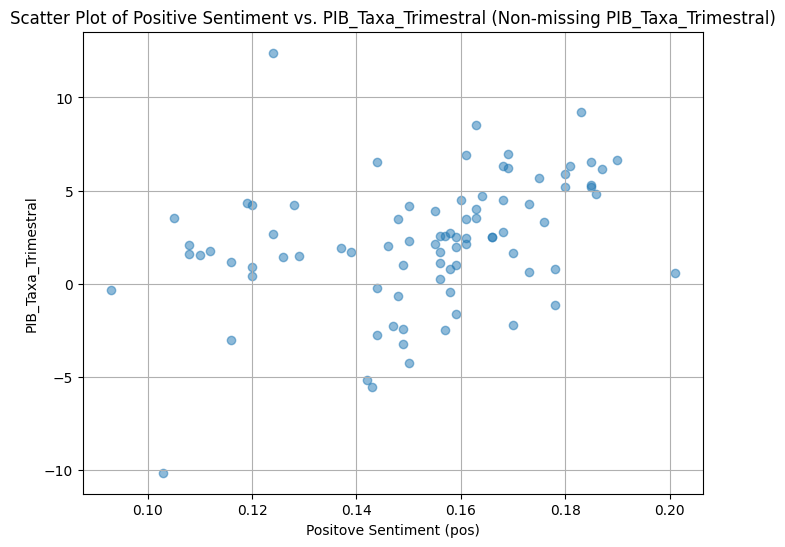

In [8]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Valor' is not missing
filtered_df = df_final

# Extract the 'neg' and 'Valor' columns from the filtered DataFrame
pos_values = filtered_df['pos']
valor_values = filtered_df['PIB_Taxa_Trimestral']

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(pos_values, valor_values, alpha=0.5)  # alpha controls point transparency
plt.xlabel("Positove Sentiment (pos)")
plt.ylabel("PIB_Taxa_Trimestral")
plt.title("Scatter Plot of Positive Sentiment vs. PIB_Taxa_Trimestral (Non-missing PIB_Taxa_Trimestral)")
plt.grid(True)  # Add a grid for better visualization
plt.show()

In [9]:
# Função para obter o vetor médio
def get_average_vector(text):
    if isinstance(text, str):  # Verifica se o texto é uma string
        words = text.split()
        word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
    return np.zeros(word2vec_model.vector_size)  # Retorna vetor zero se não houver palavras válidas ou se o texto não for string

# Criar a nova coluna 'Texto Processado'
df_final['Vetor Médio'] = df_final['Texto Processado2'].apply(get_average_vector)

   trimestre                                               Link  \
0     2003Q2  https://www.bcb.gov.br/en/publications/copommi...   
1     2003Q3  https://www.bcb.gov.br/en/publications/copommi...   
2     2003Q4  https://www.bcb.gov.br/en/publications/copommi...   
3     2004Q1  https://www.bcb.gov.br/en/publications/copommi...   
4     2004Q2  https://www.bcb.gov.br/en/publications/copommi...   
..       ...                                                ...   
86    2024Q4  https://www.bcb.gov.br/en/publications/copommi...   
87    2025Q1                                                NaN   
88    2025Q2                                                NaN   
89    2025Q3                                                NaN   
90    2025Q4                                                NaN   

                                                Texto  \
0   85th Copom minutes - June 2003 84th Copom minu...   
1   88th Copom minutes - September 2003 87th Copom...   
2   91st Copom minutes -

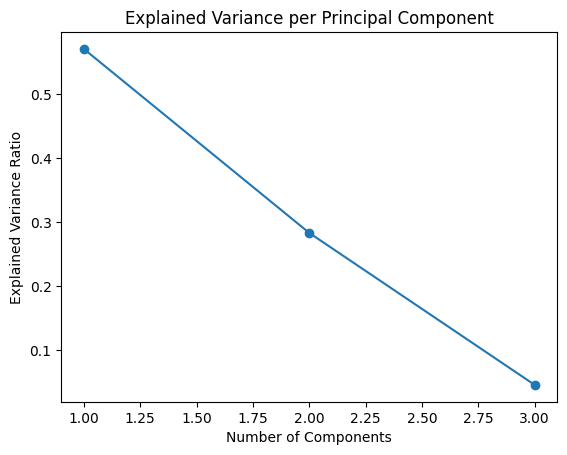

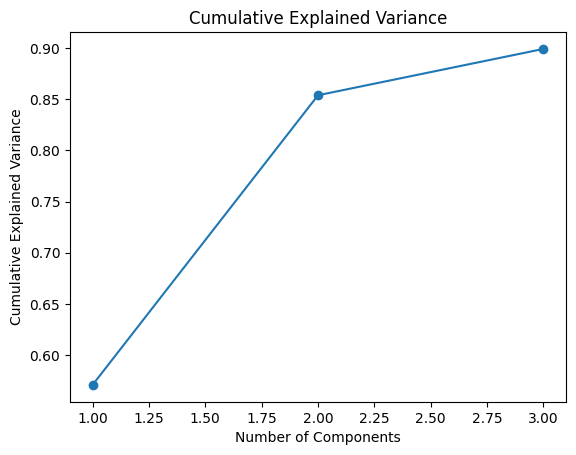

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separar as features e o target
X = df_final['Vetor Médio'].to_list()
X = np.array(X)

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=3)  # Ajustar o número de componentes conforme necessário
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=X_pca,
                             columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)],
                             index=df_final.index)  # Use original index

# Concatenate the principal components with the original DataFrame
df_final_pca = pd.concat([df_final, principal_df], axis=1)
df_final_pca['PCA'] = X_pca.tolist()

print(df_final_pca)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print cumulative explained variance
print("\nCumulative Explained Variance:")
for i, variance in enumerate(cumulative_variance):
    print(f"PC{i+1}: {variance:.4f}")

# Plot explained variance
import matplotlib.pyplot as plt
plt.plot(range(1, pca.n_components_ + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()

# Plot cumulative explained variance
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

LASSO X AR2

<ipython-input-11-44ddfe79307d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned[['PIB_Taxa_Trimestral', 'PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']] = imputer.fit_transform(df_final_cleaned[['PIB_Taxa_Trimestral', 'PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT

                                                 Vetor Médio  \
trimestre                                                      
2003Q2     [-0.1635549, 0.25964653, -0.09983721, 0.098980...   
2003Q3     [-0.16888928, 0.27761626, -0.086413406, 0.0985...   
2003Q4     [-0.1309134, 0.28480953, -0.09385836, 0.103735...   
2004Q1     [-0.19733411, 0.29359087, -0.08689095, 0.12411...   
2004Q2     [-0.17933013, 0.31993374, -0.093742356, 0.1100...   
...                                                      ...   
2024Q4     [-0.19917993, 0.31556627, 0.054714233, 0.25300...   
2025Q1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2025Q2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2025Q3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2025Q4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

           PIB_Taxa_Trimestral  PIB_Taxa_Trimestral_lag1  \
trimestre                                                  
2003Q2                0.781242                 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

   trimestre  PIB_Taxa_Trimestral  Previsao_Lasso  Previsao_AR2
0     2014Q1             3.469368        4.089699      3.036342
1     2014Q2            -0.435273       -0.333231      4.223142
2     2014Q3            -0.638794        1.124707     -0.572024
3     2014Q4            -0.228499        1.703733      0.978574
4     2015Q1            -1.619408       -0.171887      1.376033
5     2015Q2            -2.740372       -1.133105     -0.516005
6     2015Q3            -4.262841       -2.595629     -1.440436
7     2015Q4            -5.519571       -3.845217     -3.082316
8     2016Q1            -5.138237       -3.527208     -4.352256
9     2016Q2            -3.218500       -1.569712     -3.550410
10    2016Q3            -2.454189       -1.262302     -1.415792
11    2016Q4            -2.261148       -1.394508     -1.293011
12    2017Q1             0.281996        1.326332     -1.474946
13    2017Q2             0.787469        1.244384      1.763339
14    2017Q3             1.640706       

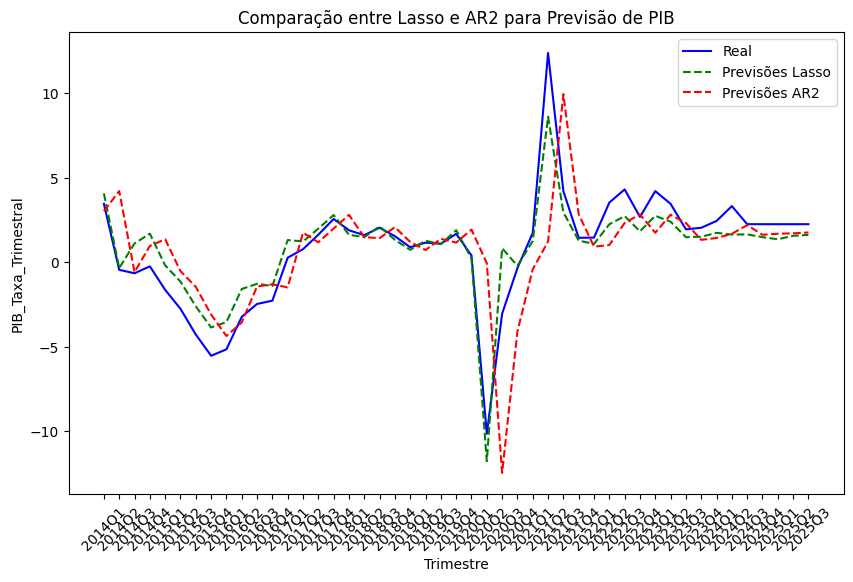

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


# Criando um DF com os nomes das colunas desejadas
colunas_selecionadas = ['trimestre', 'Vetor Médio', 'PIB_Taxa_Trimestral','PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']
df_final_cleaned = df_final_pca[colunas_selecionadas]

# Remover todas as observações (linhas) que contenham NaN em qualquer coluna
#df_final_cleaned = df_final_cleaned.dropna()

# Substitui os NaN pela média das colunas
imputer = SimpleImputer(strategy='mean')
df_final_cleaned[['PIB_Taxa_Trimestral', 'PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']] = imputer.fit_transform(df_final_cleaned[['PIB_Taxa_Trimestral', 'PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']])

# Convert the 'trimestre' column to a PeriodIndex with quarterly frequency
df_final_cleaned.set_index('trimestre', inplace=True)

print(df_final_cleaned)

# Tamanho da janela (rolling window) e número de períodos a prever
window_size = 43  # Tamanho da janela de treino
forecast_periods = 1  # Prever 1 período à frente (próximo trimestre)

# Função para realizar a previsão usando Lasso e AR(2)
def rolling_forecast(df, window_size, forecast_periods, model):
    forecasts = []
    coefficients = []

    # Expansão do vetor médio em variáveis separadas (dimensões 1 a 300)
    vetor_medio_columns = [f'Vetor_Medio_{i}' for i in range(300)]
    df_vetor_medio_expanded = pd.DataFrame(df['Vetor Médio'].tolist(), columns=vetor_medio_columns, index=df.index)

    # Juntando os dados expandidos com as variáveis defasadas
    df_expanded = pd.concat([df_vetor_medio_expanded, df[['PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']]], axis=1)

    for i in range(window_size, len(df) - forecast_periods):
        # Dividir os dados de treino e teste com base na janela
        train_data = df_expanded.iloc[i - window_size:i]
        test_data = df.iloc[i + forecast_periods:i + forecast_periods + 1]


        if model == 'lasso':
            # Definir as variáveis independentes (X) e dependentes (y)
            X_train = train_data.values  # X será todo o DataFrame expandido (vetores + defasagens)
            y_train = df['PIB_Taxa_Trimestral'].iloc[i - window_size:i].values

            # Aplique a concatenação corretamente
            X_test = np.concatenate([test_data['Vetor Médio'].iloc[0],
                         [test_data['PIB_Taxa_Trimestral_lag1'].iloc[0],
                          test_data['PIB_Taxa_Trimestral_lag2'].iloc[0]]])
            X_test = X_test.reshape(1, -1)  # Certifique-se de que X_test seja uma matriz 2D

            # Criar o modelo Lasso e treinar com a janela de treino
            model_lasso = Lasso(alpha=0.1)  # Alpha pode ser ajustado para regularização
            model_lasso.fit(X_train, y_train)

            # Fazer a previsão
            forecast = model_lasso.predict(X_test)[0]
            forecasts.append(forecast)
            coefficients.append(model_lasso.coef_)

        elif model == 'ar2':
            # Modelo AR(2)
            model_ar2 = AutoReg(df['PIB_Taxa_Trimestral'].iloc[i - window_size:i], lags=2)
            model_ar2_fit = model_ar2.fit()
            forecast_series = model_ar2_fit.forecast(steps=forecast_periods)

            # A previsão é uma pandas.Series. Acesse o primeiro valor usando .iloc[0]
            forecast = forecast_series.iloc[0]  # Ou .values[0] se preferir usar numpy array

            forecasts.append(forecast)
            coefficients.append(model_ar2_fit.params)

    return forecasts, coefficients

# Realizar a previsão para Lasso
lasso_forecasts, lasso_coefficients = rolling_forecast(df_final_cleaned, window_size, forecast_periods, 'lasso')

# Realizar a previsão para AR2
ar2_forecasts, ar2_coefficients = rolling_forecast(df_final_cleaned, window_size, forecast_periods, 'ar2')

# Criar a série temporal das previsões
# Corrigir o índice para evitar problemas de 'KeyError'
actual_values = df_final_cleaned['PIB_Taxa_Trimestral'].iloc[window_size:window_size + len(lasso_forecasts)]

# Criando o DataFrame com as colunas desejadas
resultado_df = pd.DataFrame({
    'trimestre': actual_values.index,  # Índices dos trimestres reais
    'PIB_Taxa_Trimestral': actual_values.values,  # Valores reais do PIB_Taxa_Trimestral
    'Previsao_Lasso': lasso_forecasts,  # Previsões do modelo Lasso
    'Previsao_AR2': ar2_forecasts  # Previsões do modelo AR2
})

# Exibir o DataFrame resultante
print(resultado_df)

# Calcular o MSE para Lasso
mse_lasso = mean_squared_error(actual_values, lasso_forecasts)
print(f'Mean Squared Error (MSE) - Lasso: {mse_lasso}')

# Calcular o MSE para AR2
mse_ar2 = mean_squared_error(actual_values, ar2_forecasts)
print(f'Mean Squared Error (MSE) - AR2: {mse_ar2}')

# Exibir os coeficientes do modelo Lasso
#print("Coeficientes do modelo Lasso:")
coef_df_lasso = pd.DataFrame(lasso_coefficients, columns=[f'Coef_Vetor_Medio_{i}' for i in range(300)] + ['PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2'])
#print(coef_df_lasso)

# Exibir os coeficientes do modelo AR2
#print("Coeficientes do modelo AR2:")
coef_df_ar2 = pd.DataFrame(ar2_coefficients)
#print(coef_df_ar2)

# Plotar os resultados (valores reais vs previsões)
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values.values, label='Real', color='blue')
plt.plot(actual_values.index, lasso_forecasts, label='Previsões Lasso', linestyle='--', color='green')
plt.plot(actual_values.index, ar2_forecasts, label='Previsões AR2', linestyle='--', color='red')
plt.xlabel('Trimestre')
plt.ylabel('PIB_Taxa_Trimestral')
plt.title('Comparação entre Lasso e AR2 para Previsão de PIB')
plt.legend()
plt.xticks(rotation=45)
plt.show()


lasso x ar2 (melhor alpha cv)

Melhor lambda para Lasso: 0.046415888336127774
[-0.         -0.          0.          0.          0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
  0.         -0.          0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.          0.          0.         -0.         -0.
  0.         -0.         -0.          0.          0.         -0.
  0.         -0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.          0.          0.          0.
  0.         -0.          0.          0.          0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
  0.         -0.         -0.         -0.   

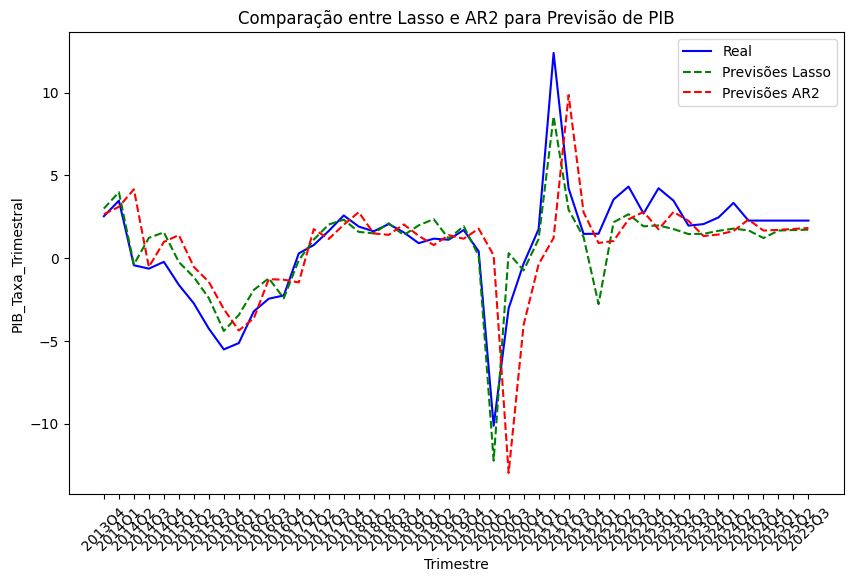

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV  # Importando LassoCV
from sklearn.model_selection import TimeSeriesSplit  # Importando TimeSeriesSplit
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="Could not infer format")

# Criando um DF com os nomes das colunas desejadas
colunas_selecionadas = ['trimestre', 'Vetor Médio', 'PIB_Taxa_Trimestral','PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']
df_final_cleaned = df_final_pca[colunas_selecionadas]

# Remover todas as observações (linhas) que contenham NaN em qualquer coluna
#df_final_cleaned = df_final_cleaned.dropna()

# Substitui os NaN pela média das colunas
imputer = SimpleImputer(strategy='mean')
df_final_cleaned[['PIB_Taxa_Trimestral', 'PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']] = imputer.fit_transform(df_final_cleaned[['PIB_Taxa_Trimestral', 'PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']])

# Converter a coluna 'trimestre' para o index
df_final_cleaned.set_index('trimestre', inplace=True)

# Tamanho da janela (rolling window) e número de períodos a prever
window_size = 42
forecast_periods = 1

# Função para realizar a previsão usando Lasso e AR(2)
def rolling_forecast(df, window_size, forecast_periods, model):
    forecasts = []
    coefficients = []

    # Expansão do vetor médio em variáveis separadas (dimensões 1 a 300)
    vetor_medio_columns = [f'Vetor_Medio_{i}' for i in range(300)]
    df_vetor_medio_expanded = pd.DataFrame(df['Vetor Médio'].tolist(), columns=vetor_medio_columns, index=df.index)

    # Juntando os dados expandidos com as variáveis defasadas
    df_expanded = pd.concat([df_vetor_medio_expanded, df[['PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']]], axis=1)

    for i in range(window_size, len(df) - forecast_periods):
        # Dividir os dados de treino e teste com base na janela
        train_data = df_expanded.iloc[i - window_size:i]
        test_data = df.iloc[i + forecast_periods:i + forecast_periods + 1]

        if model == 'lasso':
            # Definir as variáveis independentes (X) e dependentes (y)
            X_train = train_data.values  # X será todo o DataFrame expandido (vetores + defasagens)
            y_train = df['PIB_Taxa_Trimestral'].iloc[i - window_size:i].values

            # concatenação para garantir que as variáveis 'lag' não sejam regularizadas
            X_test = np.concatenate([test_data['Vetor Médio'].iloc[0],
                         [test_data['PIB_Taxa_Trimestral_lag1'].iloc[0],
                          test_data['PIB_Taxa_Trimestral_lag2'].iloc[0]]])
            X_test = X_test.reshape(1, -1)  # Certifique-se de que X_test seja uma matriz 2D

            # Definir o TimeSeriesSplit para validação cruzada temporal
            tscv = TimeSeriesSplit(n_splits=5)  # Número de "folds" para a validação cruzada

            #Criar o modelo LassoCV com TimeSeriesSplit
            model_lasso_cv = LassoCV(cv=tscv, alphas=np.logspace(-4, 4, 10))  # alpha variando entre 10^-6 e 10^6 com
            model_lasso_cv.fit(X_train, y_train)

            # Obter o melhor lambda
            melhor_lambda = model_lasso_cv.alpha_
            print(f"Melhor lambda para Lasso: {melhor_lambda}")

            # Fazer a previsão com o melhor melhor_lambda
            forecast = model_lasso_cv.predict(X_test)[0]
            forecasts.append(forecast)
            coefficients.append(model_lasso_cv.coef_)  # A correção foi aqui, usando 'model_lasso_cv' para os coeficientes
            print(model_lasso_cv.coef_)
        elif model == 'ar2':
            # Modelo AR(2)
            model_ar2 = AutoReg(df['PIB_Taxa_Trimestral'].iloc[i - window_size:i], lags=2)
            model_ar2_fit = model_ar2.fit()
            forecast_series = model_ar2_fit.forecast(steps=forecast_periods)

            # A previsão é uma pandas.Series. Acesse o primeiro valor usando .iloc[0]
            forecast = forecast_series.iloc[0]  # Ou .values[0] se preferir usar numpy array

            forecasts.append(forecast)
            coefficients.append(model_ar2_fit.params)

    return forecasts, coefficients

# Realizar a previsão para Lasso
lasso_forecasts, lasso_coefficients = rolling_forecast(df_final_cleaned, window_size, forecast_periods, 'lasso')

# Realizar a previsão para AR2
ar2_forecasts, ar2_coefficients = rolling_forecast(df_final_cleaned, window_size, forecast_periods, 'ar2')

# Criar a série temporal das previsões
actual_values = df_final_cleaned['PIB_Taxa_Trimestral'].iloc[window_size:window_size + len(lasso_forecasts)]

# Calcular o MSE para Lasso
mse_lasso = mean_squared_error(actual_values, lasso_forecasts)
print(f'Mean Squared Error (MSE) - Lasso: {mse_lasso}')

# Calcular o MSE para AR2
mse_ar2 = mean_squared_error(actual_values, ar2_forecasts)
print(f'Mean Squared Error (MSE) - AR2: {mse_ar2}')

# Criando um dicionário com os dados
data = {'Trimestre': actual_values.index,
        'Valor_Atual': actual_values,
        'Previsao_Lasso': lasso_forecasts,
        'Previsao_AR2': ar2_forecasts}

# Criando o DataFrame
df = pd.DataFrame(data)

# Definindo o trimestre como índice
df.set_index('Trimestre', inplace=True)

print(df)

# Exibir os coeficientes do modelo Lasso
#print("Coeficientes do modelo Lasso:")
coef_df_lasso = pd.DataFrame(lasso_coefficients, columns=[f'Coef_Vetor_Medio_{i}' for i in range(300)] + ['PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2'])
#print(coef_df_lasso)

# Exibir os coeficientes do modelo AR2
#print("Coeficientes do modelo AR2:")
coef_df_ar2 = pd.DataFrame(ar2_coefficients)
#print(coef_df_ar2)

# Plotar os resultados (valores reais vs previsões)
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values.values, label='Real', color='blue')
plt.plot(actual_values.index, lasso_forecasts, label='Previsões Lasso', linestyle='--', color='green')
plt.plot(actual_values.index, ar2_forecasts, label='Previsões AR2', linestyle='--', color='red')
plt.xlabel('Trimestre')
plt.ylabel('PIB_Taxa_Trimestral')
plt.title('Comparação entre Lasso e AR2 para Previsão de PIB')
plt.legend()
plt.xticks(rotation=45)
plt.show()


lasso x ar2 x ridge x en x RF (melhor alpha cv)

Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.3593813663804626
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.3593813663804626
Melhor lambda para Lasso: 0.005994842503189409
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.3593813663804626
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.005994842503189409
Melhor lambda para Lasso: 0.005994842503189409
Melhor lambda para Lasso: 0.3593813663804626
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 2.782559402207126
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.046415888336127774
Melhor lambda para Lasso: 0.3593813663804626
Melhor lambda para Lasso: 

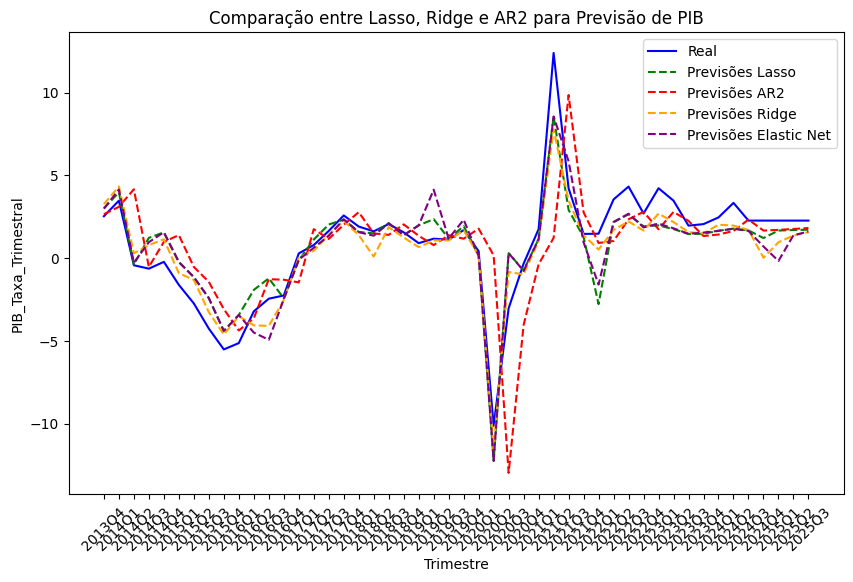

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV  # Importando LassoCV RidgeCV ElasticNetCV
from sklearn.model_selection import TimeSeriesSplit  # Importando TimeSeriesSplit
from sklearn.impute import SimpleImputer

# Criando um DF com os nomes das colunas desejadas
colunas_selecionadas = ['trimestre', 'Vetor Médio', 'PIB_Taxa_Trimestral','PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']
df_final_cleaned = df_final_pca[colunas_selecionadas]

# Remover todas as observações (linhas) que contenham NaN em qualquer coluna
#df_final_cleaned = df_final_cleaned.dropna()

# Substitui os NaN pela média das colunas
imputer = SimpleImputer(strategy='mean')
df_final_cleaned[['PIB_Taxa_Trimestral', 'PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']] = imputer.fit_transform(df_final_cleaned[['PIB_Taxa_Trimestral', 'PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']])

# Converter a coluna 'trimestre' para o index
df_final_cleaned.set_index('trimestre', inplace=True)

# Tamanho da janela (rolling window) e número de períodos a prever
window_size = 42
forecast_periods = 1

# Função para realizar a previsão usando Lasso e AR(2)
def rolling_forecast(df, window_size, forecast_periods, model):
    forecasts = []
    coefficients = []

    # Expansão do vetor médio em variáveis separadas (dimensões 1 a 300)
    vetor_medio_columns = [f'Vetor_Medio_{i}' for i in range(300)]
    df_vetor_medio_expanded = pd.DataFrame(df['Vetor Médio'].tolist(), columns=vetor_medio_columns, index=df.index)

    # Juntando os dados expandidos com as variáveis defasadas
    df_expanded = pd.concat([df_vetor_medio_expanded, df[['PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2']]], axis=1)

    for i in range(window_size, len(df) - forecast_periods):
        # Dividir os dados de treino e teste com base na janela
        train_data = df_expanded.iloc[i - window_size:i]
        test_data = df.iloc[i + forecast_periods:i + forecast_periods + 1]

        # Definir o TimeSeriesSplit para validação cruzada temporal
        tscv = TimeSeriesSplit(n_splits=5)  # Número de "folds" para a validação cruzada

        # Definir as variáveis independentes (X) e dependentes (y)
        X_train = train_data.values  # X será todo o DataFrame expandido (vetores + defasagens)
        y_train = df['PIB_Taxa_Trimestral'].iloc[i - window_size:i].values

        # concatenação para garantir que as variáveis 'lag' não sejam regularizadas
        X_test = np.concatenate([test_data['Vetor Médio'].iloc[0],
                     [test_data['PIB_Taxa_Trimestral_lag1'].iloc[0],
                      test_data['PIB_Taxa_Trimestral_lag2'].iloc[0]]])
        X_test = X_test.reshape(1, -1)  # Certifique-se de que X_test seja uma matriz 2D

        if model == 'lasso':
            # Modelo Lasso

            #Criar o modelo LassoCV com TimeSeriesSplit
            model_lasso_cv = LassoCV(cv=tscv, alphas=np.logspace(-4, 4, 10))  # alpha variando entre 10^-4 e 10^4
            model_lasso_cv.fit(X_train, y_train)

            # Obter o melhor lambda
            melhor_lambda = model_lasso_cv.alpha_
            print(f"Melhor lambda para Lasso: {melhor_lambda}")

            # Fazer a previsão com o melhor melhor_lambda
            forecast = model_lasso_cv.predict(X_test)[0]
            forecasts.append(forecast)
            coefficients.append(model_lasso_cv.coef_)  # A correção foi aqui, usando 'model_lasso_cv' para os coeficientes
            #print(model_lasso_cv.coef_)

        elif model == 'ar2':
            # Modelo AR(2)
            model_ar2 = AutoReg(df['PIB_Taxa_Trimestral'].iloc[i - window_size:i], lags=2)
            model_ar2_fit = model_ar2.fit()
            forecast_series = model_ar2_fit.forecast(steps=forecast_periods)

            # A previsão é uma pandas.Series. Acesse o primeiro valor usando .iloc[0]
            forecast = forecast_series.iloc[0]  # Ou .values[0] se preferir usar numpy array

            forecasts.append(forecast)
            coefficients.append(model_ar2_fit.params)
        elif model == 'ridge':
            # Modelo Ridge

            #Criar o modelo RidgeCV com TimeSeriesSplit
            model_ridge_cv = RidgeCV(cv=tscv, alphas=np.logspace(-4, 4, 10))  # alpha variando entre 10^-4 e 10^4
            model_ridge_cv.fit(X_train, y_train)

            # Obter o melhor lambda
            melhor_lambda = model_ridge_cv.alpha_
            print(f"Melhor lambda para Ridge: {melhor_lambda}")

            # Fazer a previsão com o melhor melhor_lambda
            forecast = model_ridge_cv.predict(X_test)[0]
            forecasts.append(forecast)
            coefficients.append(model_ridge_cv.coef_)  # A correção foi aqui, usando 'model_ridge_cv' para os coeficientes
            #print(model_ridge_cv.coef_)
        elif model == 'elastic_net':
            # Modelo Elastic Net

            #Criar o modelo ElasticNetCV com TimeSeriesSplit
            model_elastic_net = ElasticNetCV(cv=tscv, alphas=np.logspace(-4, 4, 10),
                                              l1_ratio=np.linspace(0, 1, 10))
            model_elastic_net.fit(X_train, y_train)

            # Obter os melhores parâmetros alpha e l1_ratio
            melhor_alpha = model_elastic_net.alpha_
            melhor_l1_ratio = model_elastic_net.l1_ratio_
            print(f"Melhor alpha para Elastic Net: {melhor_alpha}")
            print(f"Melhor l1_ratio para Elastic Net: {melhor_l1_ratio}")

            # Fazer a previsão com os melhores parâmetros
            forecast = model_elastic_net.predict(X_test)[0]
            forecasts.append(forecast)
            coefficients.append(model_elastic_net.coef_)
            #print(model_elastic_net.coef_)
    return forecasts, coefficients

# Realizar a previsão
lasso_forecasts, lasso_coefficients = rolling_forecast(df_final_cleaned, window_size, forecast_periods, 'lasso')
ar2_forecasts, ar2_coefficients = rolling_forecast(df_final_cleaned, window_size, forecast_periods, 'ar2')
ridge_forecasts, ridge_coefficients = rolling_forecast(df_final_cleaned, window_size, forecast_periods, 'ridge')
elastic_net_forecasts, elastic_net_coefficients = rolling_forecast(df_final_cleaned, window_size, forecast_periods, 'elastic_net')

# Criar a série temporal das previsões
actual_values = df_final_cleaned['PIB_Taxa_Trimestral'].iloc[window_size:window_size + len(lasso_forecasts)]

# Calcular o MSE
mse_lasso = mean_squared_error(actual_values, lasso_forecasts)
mse_ridge = mean_squared_error(actual_values, ridge_forecasts)
mse_elastic_net = mean_squared_error(actual_values, elastic_net_forecasts)
mse_ar2 = mean_squared_error(actual_values, ar2_forecasts)
print(f'Mean Squared Error (MSE) - Lasso: {mse_lasso}')
print(f'Mean Squared Error (MSE) - Ridge: {mse_ridge}')
print(f'Mean Squared Error (MSE) - Elastic Net: {mse_elastic_net}')
print(f'Mean Squared Error (MSE) - AR2: {mse_ar2}')

# Criando um dicionário com os dados
data = {'Trimestre': actual_values.index,
        'Valor_Atual': actual_values,
        'Previsao_Lasso': lasso_forecasts,
        'Previsao_Ridge': ridge_forecasts,
        'Previsao_Elastic_Net': elastic_net_forecasts,
        'Previsao_AR2': ar2_forecasts}

# Criando o DataFrame
df = pd.DataFrame(data)

# Definindo o trimestre como índice
df.set_index('Trimestre', inplace=True)

print(df)

# Exibir os coeficientes do modelo Lasso
#print("Coeficientes do modelo Lasso:")
coef_df_lasso = pd.DataFrame(lasso_coefficients, columns=[f'Coef_Vetor_Medio_{i}' for i in range(300)] + ['PIB_Taxa_Trimestral_lag1', 'PIB_Taxa_Trimestral_lag2'])
#print(coef_df_lasso)

# Exibir os coeficientes do modelo AR2
#print("Coeficientes do modelo AR2:")
coef_df_ar2 = pd.DataFrame(ar2_coefficients)
#print(coef_df_ar2)

# Plotar os resultados (valores reais vs previsões)
plt.figure(figsize=(10, 6))
plt.plot(actual_values.index, actual_values.values, label='Real', color='blue')
plt.plot(actual_values.index, lasso_forecasts, label='Previsões Lasso', linestyle='--', color='green')
plt.plot(actual_values.index, ar2_forecasts, label='Previsões AR2', linestyle='--', color='red')
plt.plot(actual_values.index, ridge_forecasts, label='Previsões Ridge', linestyle='--', color='orange')
plt.plot(actual_values.index, elastic_net_forecasts, label='Previsões Elastic Net', linestyle='--', color='purple')
plt.xlabel('Trimestre')
plt.ylabel('PIB_Taxa_Trimestral')
plt.title('Comparação entre Lasso, Ridge e AR2 para Previsão de PIB')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Sintonia fina de base pre treinada - esta so usando os vetores, nao esta treinando de novo!

In [ ]:
import numpy as np
from gensim.models import KeyedVectors, Word2Vec
import os
from google.colab import drive

drive.mount('/content/drive')

# Defina o caminho para os embeddings
embeddings_path = '/content/drive/My Drive/Caen/TESE/word2vec-google-news-300.model.vectors.npy'

# Carregar os vetores
vectors = np.load(embeddings_path)

# Tokenizar cada frase do seu DataFrame
corpus = df_final['Texto Processado'].tolist()
corpus = [text for text in corpus if isinstance(text, str) and text.strip() != ""]
tokenized_corpus = [sentence.split() for sentence in corpus]  # Tokenização simples

# Criar um novo modelo Word2Vec
word2vec_model = Word2Vec(vector_size=300, window=5, min_count=1, sg=1)

# Construir o vocabulário do corpus
word2vec_model.build_vocab(tokenized_corpus)

# Inicializar os vetores do novo modelo com os vetores pré-treinados
for word in word2vec_model.wv.index_to_key:
    if word in vectors:  # Verifique se a palavra existe nos vetores
        word2vec_model.wv[word] = vectors[vectors.index(word)]  # Atribua o vetor pré-treinado

# Treinar o modelo no seu conjunto de dados
word2vec_model.train(tokenized_corpus, total_examples=len(tokenized_corpus), epochs=word2vec_model.epochs)

# Salvar o novo modelo
word2vec_model.save("/content/drive/My Drive/Caen/TESE/meu_modelo_fine_tuned_word2vec.model")